In [1]:
from fastai.text.all import *
from pathlib import Path

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [2]:
torch.__version__

'1.13.1+cu117'

In [3]:
torch.cuda.is_available()

True

In [4]:
path_top21 =  Path('../data/train21_shuffled.csv')
df = pd.read_csv(path_top21)

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
44370,3,5,41,I don't know. It felt far.,Pam,False
44371,3,10,43,"Excuse me [tries to take away meat with chopsticks] Ah, un guard. [Fights with chopsticks and laughs] Family style.",Michael,False
44372,5,23,19,I never went to Thailand.,Ryan,False
44373,3,4,1,"[breathless] All right. Okay. [goes back down pretend stairs, crawls on belly to the kitchen for the coffee]",Michael,False


In [5]:
df_reduced = df

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
44370,3,5,41,I don't know. It felt far.,Pam,False
44371,3,10,43,"Excuse me [tries to take away meat with chopsticks] Ah, un guard. [Fights with chopsticks and laughs] Family style.",Michael,False
44372,5,23,19,I never went to Thailand.,Ryan,False
44373,3,4,1,"[breathless] All right. Okay. [goes back down pretend stairs, crawls on belly to the kitchen for the coffee]",Michael,False


<Axes: >

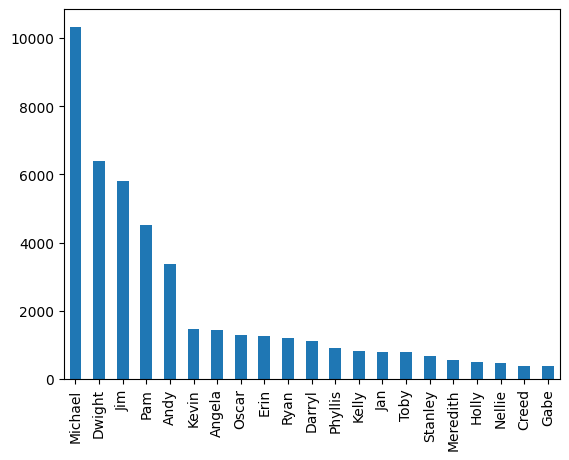

In [6]:
df_reduced['speaker'].value_counts().plot(kind='bar')

In [7]:
max_dialog = df_reduced['speaker'].value_counts().max()

10332

In [8]:
import random

dfs_oversampled = [df_reduced]
for _, group in df_reduced.groupby('speaker'):
    rand_mult = random.uniform(0.85, 1.15)
    sample_amt_to_max = max_dialog - len(group)
    dfs_oversampled.append(group.sample(int(sample_amt_to_max * rand_mult), replace=True))
df_reduced = pd.concat(dfs_oversampled)

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
32317,8,1,49,"I am on the wrong side, and I am freaking out here.",Toby,False
18266,6,13,10,What do you mean?,Toby,False
26623,8,17,17,"All right, well, let's try one simple technique together. Okay, why doesn't everyone stand? Okay, so... you're being attacked. You've got your hands up. Simple palm strike to the chin. Up to the chin. One, two.",Toby,False
30071,3,11,19,"Wish it were true, but it, it uh, seems from that photo that you took, you've entered into an intimate relationship.",Toby,False


<Axes: >

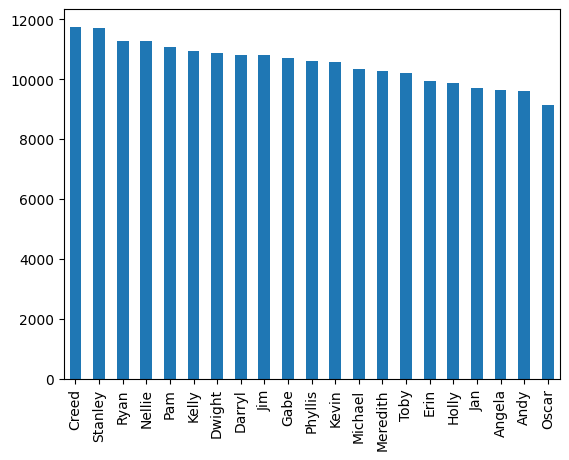

In [9]:
df_reduced['speaker'].value_counts().plot(kind='bar')

In [10]:
dls = TextDataLoaders.from_df(df_reduced, text_col='line_text', label_col='speaker', shuffle_train=True)
dls.show_batch()

,text,category
0,"xxbos xxmaj i 've really learned from the xxunk . xxmaj the great xxunk , xxmaj drew xxmaj xxunk , xxmaj ryan xxmaj xxunk , uh , the xxmaj xxunk guy not so much . xxmaj he 's more the signing , xxmaj wayne xxmaj xxunk . xxmaj um , xxmaj robin xxmaj williams . xxmaj oh , man , would i love to go head - to - head with him . xxmaj oh ! xxmaj that would be exciting . [ as xxmaj robin xxmaj williams ] ' hi . xxmaj i 'm xxmaj xxunk from xxmaj xxunk . ' xxmaj well , xxmaj i 'm xxmaj xxunk from xxmaj xxunk . xxmaj nanoo , nanoo . xxmaj xxunk , xxunk . [ as xxmaj robin xxmaj williams ] ' that 's xxmaj good morning , xxmaj vietnam ! ' xxmaj well , hello to you . xxmaj",Michael
1,"xxbos xxmaj it 's xxmaj secretary 's xxmaj day . xxmaj and it is xxmaj erin 's and my three - week anniversary . xxmaj so perfect storm for a romantic gesture . [ andy unfurling a giant ' happy xxmaj secretary 's xxmaj day ' banner by reception , placing a teddy bear on xxmaj erin 's chair ] . xxmaj want to make sure the whole office remembers it 's xxmaj secretary 's xxmaj day . i sent an e - mail blast , a text blast , a good , old - fashioned talk blast . i sent a snail mail blast a week ago . xxmaj and a xxmaj stern reminder via fax at 7:00 this morning , so people better step up and appreciate the crap out of xxmaj erin .",Andy
2,"xxbos xxmaj do you really expect me to not push you up against the wall , xxunk ? ! [ employees protest ] xxmaj all right , hey , hey , hey , hey , that 's just the way we talk in the clink . xxmaj been a lot of fun talk about prison today , but i am here to scare you straight . i xxup am xxup here xxup to xxup scare xxup you xxup xxunk xxrep 3 i xxup ght ! ! xxmaj in prison you are somebody 's bitch . xxmaj oh , and you . [ points to xxmaj ryan ] xxmaj you , my friend , would be da xxunk of da ball . xxmaj do n't drop the soap ! xxmaj do n't drop the soap !",Michael
3,"xxbos xxmaj abe and xxmaj mary are seated watching the show . [ in xxmaj lincoln voice ] xxmaj oh xxmaj mary this is wonderful ' xxmaj ok xxmaj mary stop your scolding . xxmaj i 'll be quiet . [ aside to the audience ] i need her like i need a hole in the head ! [ scattered chuckles from the crowd ] [ gabe raises his hand with a finger pointed in the shape of a gun to his head ] xxup bang ! xxmaj ooh [ gabe falls to the ground and the crowd claps , xxmaj gabe picks up the xxmaj lincoln hat , bows , runs to the crowd and trades it back for his pink ' dm does xxup gb ' hat and runs off ]",Gabe
4,"xxbos xxmaj so this is our sales staff . xxmaj they are the ones who are making calls and making us lots of money . [ comes to a screeching halt and laughs ] xxmaj this is accounting . xxmaj the numbers dudes . xxmaj do not let the job description fool you , they are all completely crazy . xxmaj especially that guy , he is a mental patient . [ camera zooms in on xxmaj kevin ] xxmaj not literally of course , that would n't work . xxmaj the last place you 'd want somebody like that is accounting . [ hides behind office plant ] ' very interesting , but stupid . ' xxmaj xxunk xxmaj johnson . xxmaj it 's a crazy place .",Michael
5,"xxbos xxmaj stone and xxmaj son xxmaj suit xxmaj warehouse recently lost their paper provider . xxmaj they 're a family owned business [ chuckles ] . xxmaj jim and i used to clean up at those . xxmaj we 'd go in pretending to be family ' brothers . xxmaj we did it at a family owned law firm , at a family owned construction company , and a family owned motorcycle store . xxmaj jim and xxmaj dwight xxmaj xxunk . i was the dynamic , xxunk winner that was xxunk upon by xxmaj mom . xxmaj and xxmaj jim was the xxunk foot xxunk pretending to belong . xxmaj the client never knew any of that , but i knew .",Dwight
6,"xxbos xxmaj we are all branches on this tree . xxmaj and from the tree comes paper . xxmaj we 're all part of a business . xxmaj but business is war . xxmaj what 's that i hear ? xxmaj uh , a rebel paper company is coming to take

0.01

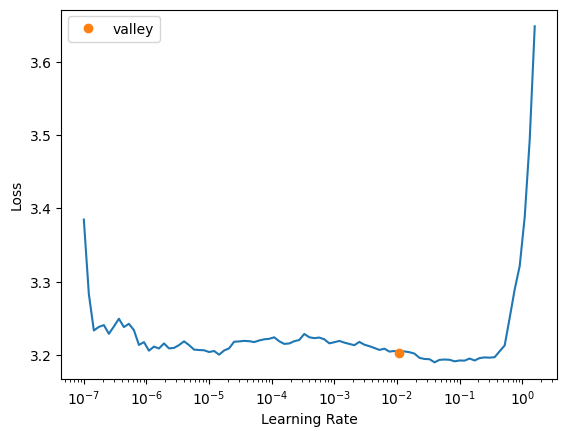

In [11]:
learner = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.75, metrics=accuracy)
learner.lr_find()
# learner.fine_tune(10, 1e-2)
suggestedLR = 1e-2

In [12]:
learner.fine_tune(25, suggestedLR)

epoch,train_loss,valid_loss,accuracy,time
0,3.007637,2.978273,0.098718,00:38


epoch,train_loss,valid_loss,accuracy,time
0,2.677375,2.444449,0.288037,01:20
1,2.260271,1.901462,0.439686,01:20
2,2.004830,1.502201,0.547561,01:21
3,1.776353,1.205998,0.631537,01:19
4,1.413829,1.024113,0.686255,01:18
5,1.198441,0.896245,0.722658,01:18
6,1.058492,0.774144,0.754336,01:19
7,0.986929,0.708603,0.774346,01:18
8,0.848316,0.663392,0.787031,01:19
9,0.816960,0.644388,0.794741,01:19


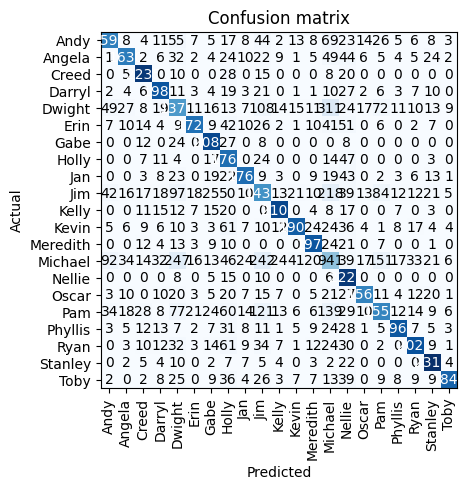

In [13]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

In [14]:
learner.fine_tune(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.469514,0.488052,0.853461,00:48


epoch,train_loss,valid_loss,accuracy,time
0,0.521985,0.477832,0.855631,01:22
1,0.536701,0.490405,0.853144,01:23
2,0.511266,0.503987,0.847559,01:22
3,0.552387,0.493297,0.851855,01:22
4,0.578828,0.490478,0.854184,01:21
5,0.440064,0.493047,0.855337,01:21
6,0.567588,0.474738,0.860063,01:22
7,0.402548,0.476791,0.861533,01:21
8,0.381073,0.474778,0.863387,01:19
9,0.378898,0.478058,0.863477,01:19


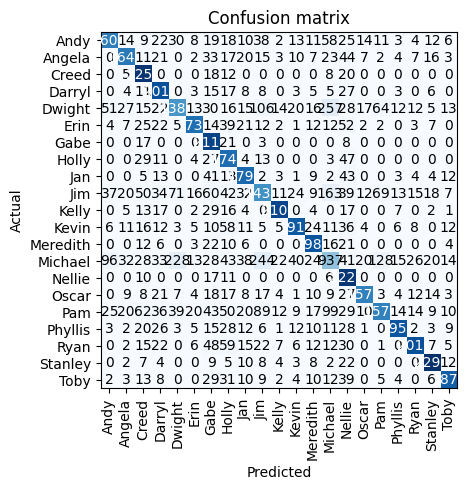

In [15]:
interp.plot_confusion_matrix()

In [16]:
dls.show_batch()

,text,category
0,"xxbos xxmaj i 've really learned from the xxunk . xxmaj the great xxunk , xxmaj drew xxmaj xxunk , xxmaj ryan xxmaj xxunk , uh , the xxmaj xxunk guy not so much . xxmaj he 's more the signing , xxmaj wayne xxmaj xxunk . xxmaj um , xxmaj robin xxmaj williams . xxmaj oh , man , would i love to go head - to - head with him . xxmaj oh ! xxmaj that would be exciting . [ as xxmaj robin xxmaj williams ] ' hi . xxmaj i 'm xxmaj xxunk from xxmaj xxunk . ' xxmaj well , xxmaj i 'm xxmaj xxunk from xxmaj xxunk . xxmaj nanoo , nanoo . xxmaj xxunk , xxunk . [ as xxmaj robin xxmaj williams ] ' that 's xxmaj good morning , xxmaj vietnam ! ' xxmaj well , hello to you . xxmaj",Michael
1,"xxbos xxmaj this is gon na be good . [ xxunk reading the letter ] xxmaj to whom it may concern . [ off to the side ] xxmaj good , real personal . xxmaj thanks xxmaj michael . [ reading again ] xxmaj the dictionary xxunk xxunk as : of the highest kind , quality , or order , xxunk all else , or others . xxmaj supreme . [ to the side again ] xxmaj that 's great , if i wanted the dictionary definition xxmaj i 'd buy a dictionary . [ reading again , slowly gets xxunk ] i define it as xxmaj dwight xxmaj schrute . xxmaj as a sales executive , as a leader , as a man , and as a friend , he is of the highest kind , quality , and order . xxmaj supreme . [ holding back tears ]",Dwight
2,"xxbos xxmaj no . xxmaj no , that is not all . xxmaj let me tell you what real life is like . xxmaj the men dry up , and the nights get lonely . xxmaj the only calls on your machine are for collection agencies about that pair of motorcycle boots you never even wore . xxmaj you stalk your old high school boyfriend online , go to his daughter 's soccer games , and make a scene . xxmaj you buy a diamond ring for yourself , wear it on your right hand , and tell yourself , you 're all you need . xxmaj one day , you 're alone , tired . xxmaj at your feet , a dying bird . xxmaj but where did it come from ? xxmaj why did you kill it ? xxmaj is it because in some strange way it is",Nellie
3,"xxbos xxmaj come on , coward ! xxmaj where are you ? xxmaj where … [ spots a note attached to the bushes ; goes to read it ] ' from the desk of xxmaj andrew xxmaj bernard . ' [ scoffs ] a note . xxmaj pathetic . ' dear xxmaj dwight , by now you have received my note . xxmaj how are you ? i am well . xxmaj you are no doubt wondering why i have left this note . xxmaj it has come to my attention that in any physical match with you , i would surely be bested . ' xxmaj true . ' the soft underbelly of my xxunk upbringing is my soft underbelly … ' [ as xxmaj dwight continues to read , xxmaj andy drives around the corner very slowly ]",Dwight
4,"xxbos xxmaj all right . xxmaj wow . xxmaj um , i am never going to forget today . xxmaj not a chance . i do n't think i could ever give back to you what you have given me today . xxmaj who here has done something stupid in their lives ? xxmaj like skipped out on study hall or mix up the difference between ' a ' gym and ' b ' gym , that sort of thing ? xxmaj show of hands , anybody , yes , a bunch of you , okay . xxmaj well , me too , xxmaj i 've done something stupid which i would like to share . u xxrep 3 m . [ period bell rings ] xxmaj should we go ?",Michael
5,"xxbos well , the good news is no more guilty conscience . xxmaj at least you know he is the strangler . xxmaj the proof is in the grip . xxmaj did they say when the vocal cords would heal ? [ toby nods ] xxmaj one week ? [ toby shakes head ] xxmaj ok , two weeks ? [ toby nods ] xxmaj ok . xxmaj you offered your neck in search of the truth . xxmaj the proud neck of justice . xxmaj is n't that the expression ? xxmaj no . xxmaj well , anyway , it was , it was very brave . xxmaj it really was quite brave .",Nellie
6,"xxbos [ cats meowing in background][on nanny - cam ] xxmaj where is that bad cat ? xxmaj oh , you know who you are . xxmaj excuse me , xxmaj petals , xxmaj i 'm looking for xxmaj mr . xxmaj a

In [17]:
learner.predict("dwight try to help him down")

('Michael',
 tensor(13),
 tensor([0.0169, 0.0011, 0.0035, 0.0015, 0.0633, 0.0119, 0.0047, 0.0013, 0.0125,
         0.0916, 0.0028, 0.2221, 0.0005, 0.2424, 0.0005, 0.0028, 0.0505, 0.2210,
         0.0030, 0.0393, 0.0066]))

In [18]:
learner.show_results()

,text,category,category_
0,"xxbos i know we have to register as a xxunk sexual relationship with xxup hr . xxmaj my question : do i do it as the man ? xxmaj does she do it as my superior ? i do n't know . xxmaj that leads to other issues that we may have in our relationship . xxmaj it 's , uh , [ phone rings ] xxmaj excuse me . xxmaj hello ? xxmaj hi ! xxmaj just talking about you . xxmaj the camera ? xxmaj no . xxmaj uh huh . xxmaj how 's traffic ? i miss you . xxmaj what . xxmaj ok . xxmaj well , if it was a mistake , it was a wonderful mistake . xxmaj no . [ to camera ] xxmaj would you excuse me ? [ to xxmaj jan ] xxmaj no , i did not xxunk get you",Michael,Michael
1,"xxbos [ answering phone ] xxmaj this is xxmaj angela . xxmaj oh . xxmaj hello , xxmaj miss xxmaj polodnikovski . xxmaj uh , how can i help you ? xxmaj did my rent check not clear ? xxmaj because i just transferred another $ 25 to that account . xxmaj so if there 's a problem it 's clearly on your end . xxmaj and'oh . xxmaj oh . xxmaj oh , okay . xxmaj good . xxmaj then … um ' what is this about ? xxmaj no , no . xxmaj hey , hey ! xxmaj no , you are out of line xxmaj miss xxmaj polodnikovski . xxmaj no , no you are . xxmaj no you are ! xxmaj evicted ? xxmaj fine ! i did n't want to live in that cesspool anyway ! xxmaj listen , i get my security deposit back",Angela,Angela
2,"xxbos xxmaj you poor , simple boy . xxmaj expected a man , did you ? xxmaj strong , powerful . xxmaj huge , whopping penis ? xxmaj well , sorry to disappoint , but my huge , whopping penis is right here , [ points to her head ] and xxmaj i 'm not afraid to use it . xxmaj so stop looking at my breasts , and start looking at my penis . [ slow clap ] xxmaj i 'm xxmaj nellie xxmaj bertram , president of special projects . xxmaj in the next few weeks we 're going to throw everything you know about business out of the window and do it our own way . xxmaj are your minds blown ? xxmaj so , how did this special project come about anyway ? xxmaj well , i interviewed to be the manager of your branch .",Nellie,Nellie
3,"xxbos xxmaj no . xxmaj no , that is not all . xxmaj let me tell you what real life is like . xxmaj the men dry up , and the nights get lonely . xxmaj the only calls on your machine are for collection agencies about that pair of motorcycle boots you never even wore . xxmaj you stalk your old high school boyfriend online , go to his daughter 's soccer games , and make a scene . xxmaj you buy a diamond ring for yourself , wear it on your right hand , and tell yourself , you 're all you need . xxmaj one day , you 're alone , tired . xxmaj at your feet , a dying bird . xxmaj but where did it come from ? xxmaj why did you kill it ? xxmaj is it because in some strange way it is",Nellie,Nellie
4,"xxbos xxmaj well , uh , okay . xxmaj um . xxmaj it 's really great to be here tonight , with the xxmaj ferris wheel , the band , and the low sunlight . xxmaj i 'm gon na miss you all when i go to xxmaj costa xxmaj rica , and if i keep drinking beer like this , xxmaj i 'm gon na have to take a leak - a. [ laughter from audience , xxmaj michael looks at camera unhappily ] xxmaj look , on a more personal note , i just want to say thanks , you know , no matter what was going on in my life , you know , my divorce , or the custody battle , or that thing with my sister , it was just nice knowing i had a , a supportive place to come to where …",Toby,Toby
5,"xxbos i just gonna- xxunk [ answers phone ] xxmaj hello ? xxmaj hey , what 's the scoop ? xxmaj are you close ? xxmaj what ? xxmaj no . no , no , no , no , no . xxmaj you have to come now . xxmaj traffic clears ? xxmaj no , next xxmaj friday … that 's not gon na work . xxmaj okay . xxmaj yeah . xxmaj okay . [ inhales , hangs up ] xxmaj damn it ! xxmaj well , this is not going to be quite as delicious as i wanted , but i do have a very tasty announcement for you guys . xxmaj not only am i not a lowly janitor , i am the regional manager once again ! xxmaj guy

In [19]:
learner.predict("hes totally qualified, and smart, everyone loves him")

('Jim',
 tensor(9),
 tensor([9.3609e-03, 3.0339e-04, 7.0634e-04, 1.0803e-02, 1.1585e-02, 3.5503e-03,
         2.0997e-04, 1.8754e-04, 5.1841e-04, 7.8527e-01, 1.8812e-03, 3.5495e-03,
         1.8648e-04, 1.1575e-01, 1.6393e-04, 2.7429e-02, 1.7285e-02, 1.1307e-03,
         9.4329e-03, 4.3647e-05, 6.5638e-04]))

In [21]:
# learner.save('35epoch_all_lines')
learner.export('35epoch_all_lines')